In [7]:
from Scripts import loading as dl, profiling as pf, preprocessing as prep
import pandas as pd
from sklearn import model_selection
from sklearn.model_selection import train_test_split
from collections import Counter
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer
from sklearn.feature_selection import SelectKBest, f_regression, mutual_info_regression, f_classif
from sklearn.linear_model import LogisticRegression, SGDClassifier
from sklearn.naive_bayes import MultinomialNB
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC, LinearSVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn import metrics
import matplotlib.pyplot as plt
from sklearn.metrics import plot_confusion_matrix

In [8]:
schema_link = '../Data/amazon_phone.pkl'
amazon_link = '../Data/schema_phone.pkl'

df = dl.load_merged_data(schema_link, amazon_link, 100,9900)

In [3]:
df[df['text'] == '']

,text,label


In [4]:
df[df.label.isnull()]

,text,label


In [5]:
pf.create_word_count(df)

,text,label,word_count
0,It took forever to receive these since they co...,1.0,44
1,It's a sleek looking case but not protecting. ...,1.0,27
2,I bought this for my wife's aunt she had this ...,1.0,37
3,I have been applying screen protectors to devi...,1.0,390
4,It didn't fit my samsung s but it did fit my b...,1.0,26
...,...,...,...
49995,"""\n\t\t\t\t\t\t\t\t\t\t\t\t\t\t\t\t\t\t\t\n\t\...",5.0,30
49996,"""\n\t\t\t\t\t\t\t\t\t\t\t\t\t\t\t\t\t\t\t\n\t\...",5.0,193
49997,"""Love my new phone case it's so pretty and gir...",5.0,51
49998,"""\n\t\t\t\t\t\t\t\t\t\t\t\t\t\t\t\t\t\t\t\n\t\...",5.0,51


In [6]:
pf.get_longest_review(df)

The longest review text in our sample has 16108 words.
Longest review text:

32730    "\n             \n\n\n{\n    \"@context\":\"ht...
34743    "\n             \n\n\n{\n    \"@context\":\"ht...
Name: text, dtype: object 32730    4.0
34743    4.0
Name: label, dtype: float64


In [7]:
pf.get_shortest_review(df)

The shortest review text in our sample has 2 words.
Review text with the shortest length of 2 word appearing 2 times.
1064    Very thin!!
4162     works fine
Name: text, dtype: object 1064    2.0
4162    5.0
Name: label, dtype: float64


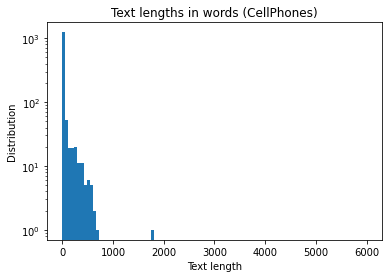

In [8]:
pf.get_word_length_dist(df, 'CellPhones', True)

In [9]:
# PREPROCESSING
df.text = prep.preprocess_reviews(df.text)

In [10]:
df.iloc[100].text

'would not purchas junk pain use mine kitchen drawer sold next yard sale'

In [ ]:
# classifier = LogReg, LinearSVC,
# Feature selection: selectkbest (f_regression, mutual_info_regression, f_classif,

In [11]:
seed = 7
X_train, X_test, y_train, y_test = train_test_split(df.text, df.label, test_size=0.25,random_state=seed, stratify=df.label)

# vectorizer = TfidfVectorizer(min_df=2 ,max_df=0.8, use_idf=True,sublinear_tf=True, ngram_range=(1,3))
vectorizer = CountVectorizer(min_df=5 ,max_df=0.9, ngram_range=(1,3))

train_vectorized = vectorizer.fit_transform(X_train)
vocab = vectorizer.get_feature_names()

print ("Feature size of TF-IDF: ", len(vocab))
test_vectorized = vectorizer.transform(X_test)

Feature size of TF-IDF:  451569


In [ ]:
# unique tokens

# most frequent tokens

#


500
Training and prediction done
Training target statistics: Counter({5.0: 7500, 3.0: 7500, 1.0: 7500, 4.0: 7500, 2.0: 7500})
Testing target statistics: Counter({3.0: 2500, 2.0: 2500, 1.0: 2500, 5.0: 2500, 4.0: 2500})
train: 75, text: 25
Accuracy:0.68816
Precision:0.6899777932349693
F1:0.6816905980022978
col_0   1.0   2.0   3.0   4.0   5.0
label                              
1.0    1989   224    30    92   165
2.0      73  2183    17    29   198
3.0     204   251  1445   416   184
4.0     155   182   344  1168   651
5.0     197   225    56   205  1817
1000
Training and prediction done
Training target statistics: Counter({5.0: 7500, 3.0: 7500, 1.0: 7500, 4.0: 7500, 2.0: 7500})
Testing target statistics: Counter({3.0: 2500, 2.0: 2500, 1.0: 2500, 5.0: 2500, 4.0: 2500})
train: 75, text: 25
Accuracy:0.79016
Precision:0.7888412144982654
F1:0.7860564209263174
col_0   1.0   2.0   3.0   4.0   5.0
label                              
1.0    2368    37    25    11    59
2.0      28  2325     4    

c:\users\d064966\appdata\local\continuum\anaconda3\envs\masterthesis\lib\site-packages\sklearn\linear_model\_logistic.py:764: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)
c:\users\d064966\appdata\local\continuum\anaconda3\envs\masterthesis\lib\site-packages\sklearn\linear_model\_logistic.py:764: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative so

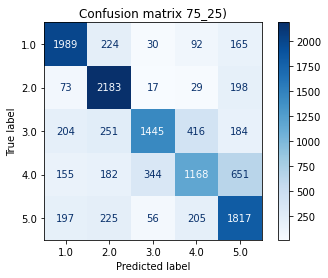

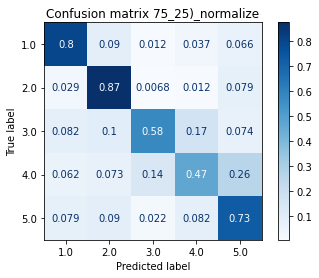

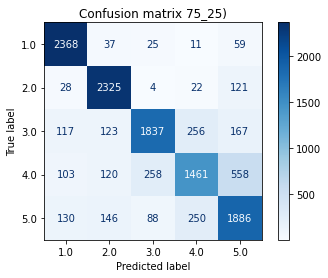

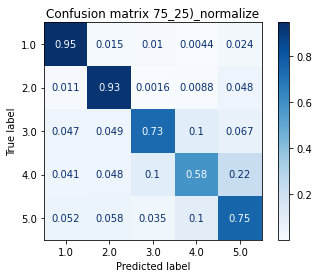

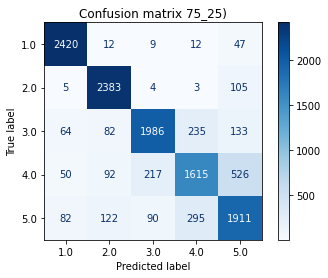

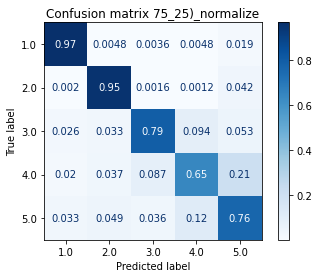

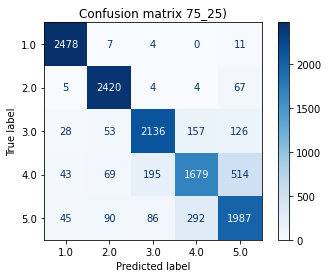

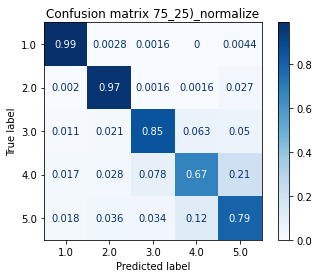

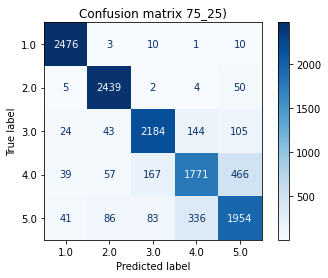

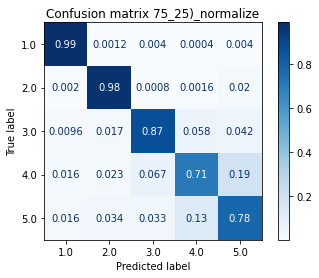

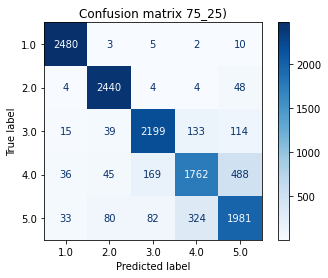

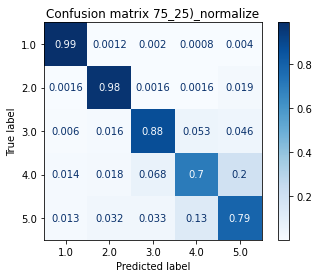

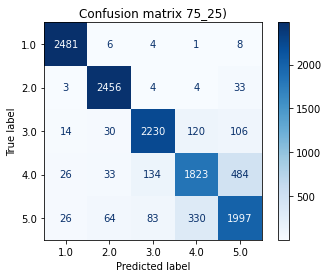

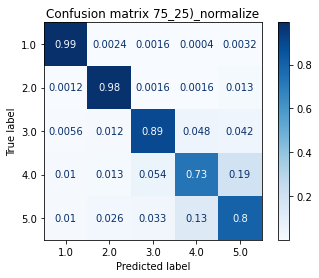

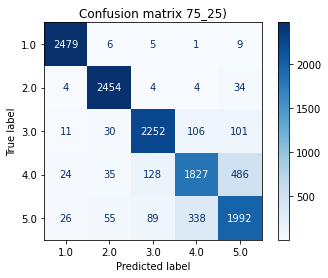

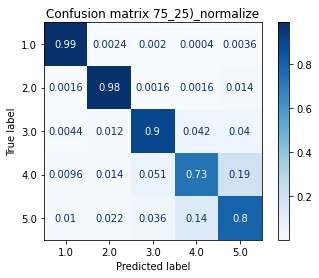

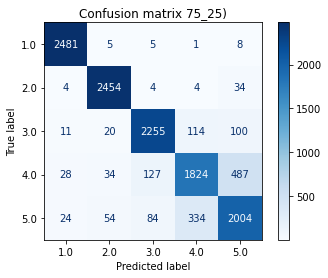

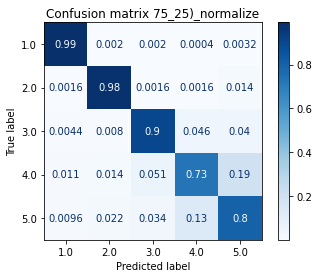

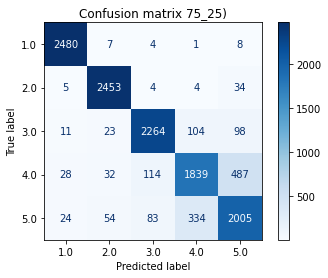

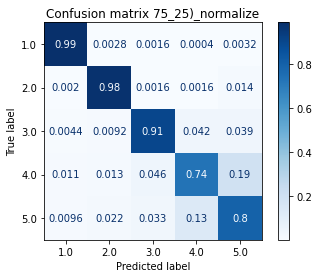

In [12]:
lst = [500, 1000, 1500, 2000, 2500, 3000, 3500, 4000, 4500, 5000]
for i in lst:
    # vectorizer_chi2 = SelectKBest(chi2,k=3000)
    vectorizer_fs = SelectKBest(score_func=f_classif, k=i)
    print(i)
    fs_train_vectorized = vectorizer_fs.fit_transform(train_vectorized,y_train)
    fs_test_vectorized = vectorizer_fs.transform(test_vectorized)

    # Train the model using the training sets
    clf = LogisticRegression(C=1.0, dual=False, fit_intercept=True, random_state=0, solver='lbfgs', intercept_scaling=1, max_iter=100, multi_class='multinomial')

    clf.fit(fs_train_vectorized, y_train)
    #Predict the response for test dataset
    y_pred = clf.predict(fs_test_vectorized)
    print("Training and prediction done")
    print('Training target statistics: {}'.format(Counter(y_train), sorted(y_train)))
    print('Testing target statistics: {}'.format(Counter(y_test), sorted(y_test)))

    # Model Accuracy, how often is the classifier correct?
    print("train: 75, text: 25")
    accuracy = str(metrics.accuracy_score(y_test, y_pred))
    precision = str(metrics.precision_score(y_test, y_pred, average="macro"))
    f1 = str(metrics.f1_score(y_test, y_pred, average="macro"))
    print("Accuracy:" + accuracy)
    print("Precision:" + precision)
    print("F1:" + f1)
    print(pd.crosstab(y_test, y_pred))

    # Visualization of Confusion Matrix and saving
    plt.rcParams['figure.facecolor'] = 'white'
    title = f"Confusion matrix 75_25)"
    disp = plot_confusion_matrix(clf, fs_test_vectorized, y_test,
                                 display_labels=[1.0, 2.0, 3.0, 4.0, 5.0],
                                 cmap=plt.cm.Blues)
    disp.ax_.set_title(title)
    plt.show()

    title_norm = title + "_normalize"
    disp_norm = plot_confusion_matrix(clf, fs_test_vectorized, y_test,
                                 display_labels=[1.0, 2.0, 3.0, 4.0, 5.0],
                                 cmap=plt.cm.Blues,
                                 normalize='true')
    disp_norm.ax_.set_title(title_norm)
    plt.show()

c:\users\d064966\appdata\local\continuum\anaconda3\envs\masterthesis\lib\site-packages\sklearn\model_selection\_split.py:297: FutureWarning: Setting a random_state has no effect since shuffle is False. This will raise an error in 0.24. You should leave random_state to its default (None), or set shuffle=True.
  FutureWarning
c:\users\d064966\appdata\local\continuum\anaconda3\envs\masterthesis\lib\site-packages\sklearn\linear_model\_logistic.py:764: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)
c:\users\d064966\appdata\local\continuum\anaconda3\envs\masterthesis\lib\site-packages\sklearn\line

LR: 0.016295 (0.010255)
SDG: 0.018063 (0.013286)
DTC: 0.020166 (0.009242)
MNB: 0.032972 (0.028805)
RND: nan (nan)
SVM: 0.022675 (0.014509)
SVC: 0.012696 (0.011116)


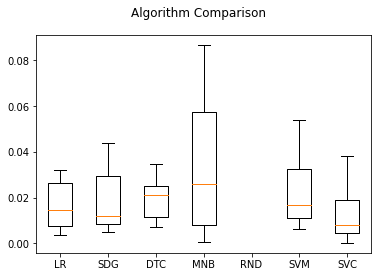

In [27]:
text_vectorized = vectorizer.fit_transform(df.text)
selected_text_vectorized = vectorizer_fs.fit_transform(text_vectorized,df.label)

results = []
names = []
scoring = 'f1_macro'
models = []

models.append(('LR', LogisticRegression(dual=False, random_state=10, multi_class="multinomial")))
models.append(('SDG', SGDClassifier()))
models.append(('DTC', DecisionTreeClassifier()))
models.append(('MNB', MultinomialNB()))
models.append(('RND', RandomForestClassifier()))
models.append(('SVM', LinearSVC(multi_class="crammer_singer")))
models.append(('SVC', SVC(decision_function_shape='ovr'))) #takes too long
seed = 7

for name, model in models:
	kfold = model_selection.KFold(n_splits=10, random_state=seed)
	cv_results = model_selection.cross_val_score(model, selected_text_vectorized, df.label, cv=kfold, scoring=scoring)
	results.append(cv_results)
	names.append(name)
	msg = "%s: %f (%f)" % (name, cv_results.mean(), cv_results.std())
	print(msg)
fig = plt.figure()
fig.suptitle('Algorithm Comparison')
ax = fig.add_subplot(111)
plt.boxplot(results)
ax.set_xticklabels(names)
plt.show()
